In [1]:
%matplotlib inline
import numpy as np # Linear Algebra
import pandas as pd # Processing
import scipy.stats as stats 
import matplotlib.pyplot as plt # Visualize
import statsmodels.formula.api as sm
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_score, train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
corolla = pd.read_csv('train.csv')
corolla_edit = pd.read_csv('train_edit.csv')

## Step 1. Domain
    - 알고 있는 내용을 먼저

Blah blah.. **Parking asssitant랑 ABS, Boardcomputer 이런게 있으면 가격이 올라!**

In [6]:
reg = sm.ols(formula = "Price ~ Age_08_04 + KM + ABS + Parking_Assistant +Boardcomputer", data = corolla).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     839.2
Date:                Mon, 14 Aug 2017   Prob (F-statistic):               0.00
Time:                        13:49:40   Log-Likelihood:                -8959.6
No. Observations:                1019   AIC:                         1.793e+04
Df Residuals:                    1013   BIC:                         1.796e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.178e+04    311.55

    - but... negative Coef
    - 아~ 2004년 이라서 그런가? 이거랑 이거랑 해보자...

### 선정해둔 변수를 쓰기 위해 끼워맞추기를 하고 있음을 깨달음
<br>
<br>
<br>

## Step 2. Simple is Best

    - 배운거 먼저 써보자
    - 결과를 보고 생각하자
    - 모든 변수들의 단순회귀를 돌려보자!

#### 2 - 1. 상관분석 (독립2표본검정, 윌콕슨의 순위합검정)
    - 0, 1로 나뉘어진 변수부터

In [9]:
def ttest():
    true_list = []
    wilcox = []
    ttestlst = []
    for i in keys:
        normal_test1 = stats.shapiro(corolla.loc[corolla[i] == 0].Price)
        normal_test2 = stats.shapiro(corolla.loc[corolla[i] == 1].Price)
        if normal_test1[1] > 0.05 and normal_test2[1] > 0.05:
            reg = stats.levene(corolla.loc[corolla[i] == 0].Price,
                           corolla.loc[corolla[i] == 1].Price,
                           center = 'mean')
            if reg.pvalue > 0.05:
                ttest = stats.ttest_ind(corolla.loc[corolla[i] == 0].Price,
                                       corolla.loc[corolla[i] == 1].Price,
                                       equal_var=True)
            else:
                ttest = stats.ttest_ind(corolla.loc[corolla[i] == 0].Price,
                                       corolla.loc[corolla[i] == 1].Price,
                                       equal_var=False)
            if ttest.pvalue < 0.05:
                true_list.append(i)
                ttestlst.append(i)
        else:
            ranksum = stats.ranksums(corolla.loc[corolla[i] == 0].Price,
                                       corolla.loc[corolla[i] == 1].Price)
            if ranksum.pvalue < 0.05:
                true_list.append(i)
                wilcox.append(i)
    print 
    print ('독립2표본검정 통과:', ttestlst)
    print
    print ('순위합검정 통과:', wilcox)

In [10]:
keys = ['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee','ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',\
        'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',\
        'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

In [11]:
ttest()

독립2표본검정 통과: []
순위합검정 통과: ['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 'Metallic_Rim', 'Tow_Bar']


#### 2 - 2. 더미변수 상관분석 (ANOVA, Kruskal)
    - 이어서 다른 CatVal도 검정하고자 함

In [15]:
keys_shapiro = ['Fuel_Type', 'CC', 'HP', 'Color', 'Quarterly_Tax']
items = []
    
for j in keys_shapiro:
    for i in corolla[j]:
        items.append(i)
    items = list(set(items))
    print(j, items)
    for x in items:
        try:
            sha = stats.shapiro(corolla.loc[corolla[j] == x].Price)
            if sha[1] > 0.05:
                stat = 'True'
            else:
                stat = 'False'
        except:
            sha = 'is not accept sharpiro'
        print(j, x, sha, stat)
    print 
    items = []

Fuel_Type ['Petrol', 'CNG', 'Diesel']
Fuel_Type Petrol (0.867547869682312, 5.864495199258021e-27) False
Fuel_Type CNG (0.9774237871170044, 0.9497301578521729) True
Fuel_Type Diesel (0.8096811771392822, 2.2093353535534987e-10) False
CC [1600, 16000, 1800, 1995, 1900, 2000, 1587, 1300, 1332, 1398, 1400, 1598]
CC 1600 (0.8682585954666138, 3.2426093430318585e-22) False
CC 16000 is not accept sharpiro False
CC 1800 (0.6740461587905884, 0.0007057987968437374) False
CC 1995 is not accept sharpiro False
CC 1900 (0.945985734462738, 0.2624093294143677) True
CC 2000 (0.7614140510559082, 3.8109995714741274e-10) False
CC 1587 is not accept sharpiro False
CC 1300 (0.9845906496047974, 0.0483618825674057) False
CC 1332 is not accept sharpiro False
CC 1398 is not accept sharpiro False
CC 1400 (0.8962551951408386, 2.2790230502778286e-07) False
CC 1598 is not accept sharpiro False
HP [192, 97, 98, 69, 72, 73, 107, 110, 116, 86, 90]
HP 192 (0.9846172332763672, 0.978855311870575) True
HP 97 (0.897603392601

    - 하지만, 모두 정규성을 만족하지 못하여 ANOVA는 하지 못하고
    - Kruskal 검정을 함

In [17]:
krus_Fuel = stats.kruskal(corolla.loc[corolla["Fuel_Type"] == 'Petrol'].Price, 
             corolla.loc[corolla["Fuel_Type"] == 'Diesel'].Price,
              corolla.loc[corolla["Fuel_Type"] == 'CNG'].Price)

krus_CC = stats.kruskal(corolla.loc[corolla["CC"] == 1600].Price,
               corolla.loc[corolla["CC"] == 1800].Price,
               corolla.loc[corolla["CC"] == 1995].Price,
               corolla.loc[corolla["CC"] == 1900].Price,
               corolla.loc[corolla["CC"] == 2000].Price,
               corolla.loc[corolla["CC"] == 1587].Price,
               corolla.loc[corolla["CC"] == 1300].Price,
               corolla.loc[corolla["CC"] == 1398].Price,
               corolla.loc[corolla["CC"] == 1400].Price,
               corolla.loc[corolla["CC"] == 1332].Price,
               corolla.loc[corolla["CC"] == 1598].Price)

krus_HP = stats.kruskal(corolla.loc[corolla["HP"] == 192].Price, 
               corolla.loc[corolla["HP"] == 97].Price,
               corolla.loc[corolla["HP"] == 98].Price,
               corolla.loc[corolla["HP"] == 69].Price,
               corolla.loc[corolla["HP"] == 72].Price,
               corolla.loc[corolla["HP"] == 73].Price,
               corolla.loc[corolla["HP"] == 107].Price,
               corolla.loc[corolla["HP"] == 110].Price,
               corolla.loc[corolla["HP"] == 116].Price,
               corolla.loc[corolla["HP"] == 86].Price,
               corolla.loc[corolla["HP"] == 90].Price)

krus_Color = stats.kruskal(corolla.loc[corolla["Color"] == 'Blue'].Price,
               corolla.loc[corolla["Color"] == 'Grey'].Price,
               corolla.loc[corolla["Color"] == 'Yellow'].Price,
               corolla.loc[corolla["Color"] == 'Green'].Price,
               corolla.loc[corolla["Color"] == 'Beige'].Price,
               corolla.loc[corolla["Color"] == 'Violet'].Price,
               corolla.loc[corolla["Color"] == 'Black'].Price,
               corolla.loc[corolla["Color"] == 'White'].Price,
               corolla.loc[corolla["Color"] == 'Silver'].Price,
               corolla.loc[corolla["Color"] == 'Red'].Price)

krus_Tax =  stats.kruskal(corolla.loc[corolla["Quarterly_Tax"] == 64].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 163].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 100].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 69].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 72].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 234].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 40].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 210].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 19].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 85].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 185].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 283].Price,
               corolla.loc[corolla["Quarterly_Tax"] == 197].Price)

print ('Fuel_Type:', krus_Fuel.pvalue)
print ('CC       :', krus_CC.pvalue)
print ('HP       :', krus_HP.pvalue)
print ('Color    :', krus_Color.pvalue)
print ('Tax      :', krus_Tax.pvalue)

Fuel_Type: 0.220929704632
CC       : 1.79170275585e-37
HP       : 1.19840553322e-50
Color    : 6.66321505059e-06
Tax      : 5.0934256821e-49


최종적으로 상관이 있다고 보여지는 CatVal은 총 21가지

['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 'Metallic_Rim', 'Tow_Bar', 'CC',
'HP', 'Color', 'Tax']

## Step 3. 돌려보자 회귀

In [19]:
keys = []
for i in corolla.keys():
    keys.append(i)
keys = keys[3:]

for i in keys:
    reg = sm.ols("Price ~ " + i, data = corolla).fit()
    print(i)
    print('P-val : {}, R-square : {}'.format(reg.pvalues, reg.rsquared))
    print()

Age_08_04
P-val : Intercept    0.0
Age_08_04    0.0
dtype: float64, R-square : 0.7812791675046182

Mfg_Month
P-val : Intercept    2.266364e-277
Mfg_Month     1.580527e-01
dtype: float64, R-square : 0.0019584910973186043

Mfg_Year
P-val : Intercept    0.0
Mfg_Year     0.0
dtype: float64, R-square : 0.7979884209145617

KM
P-val : Intercept    0.000000e+00
KM           4.210366e-91
dtype: float64, R-square : 0.33173205514871207

Fuel_Type
P-val : Intercept              1.398123e-16
Fuel_Type[T.Diesel]    5.365501e-01
Fuel_Type[T.Petrol]    6.295832e-01
dtype: float64, R-square : 0.0005078030219438645

HP
P-val : Intercept    8.523346e-05
HP           6.828504e-25
dtype: float64, R-square : 0.09916091298438501

Met_Color
P-val : Intercept    3.015852e-283
Met_Color     9.492969e-07
dtype: float64, R-square : 0.02336105600752314

Color
P-val : Intercept          0.000013
Color[T.Black]     0.241398
Color[T.Blue]      0.363353
Color[T.Green]     0.611233
Color[T.Grey]      0.166696
Color[T.R

### R-Squared 의 늪

In [20]:
# Set 1, 8개 변수
result1 = sm.ols(formula = 'Price ~ \
Mfg_Year + KM + Quarterly_Tax + Weight + Automatic_airco + Boardcomputer +\
CD_Player + Sport_Model', data = corolla).fit()
# Set 2, 9개 변수
result2 = sm.ols(formula = 'Price ~ \
Age_08_04 + KM + HP + Quarterly_Tax + Weight + ABS + Automatic_airco + \
Powered_Windows + Sport_Model', data = corolla).fit()
# Set 3, 12개 변수
result3 = sm.ols(formula = 'Price ~ \
Age_08_04 + KM + HP + Doors + Quarterly_Tax + Weight + Automatic_airco + \
Powered_Windows + Sport_Model + Backseat_Divider + Metallic_Rim', data = corolla).fit()
# Set 4, 13개 변수
result4 = sm.ols(formula = 'Price ~ \
Age_08_04 + KM + HP + Doors + Quarterly_Tax + Weight + Automatic_airco + \
CD_Player + Powered_Windows + Sport_Model + Backseat_Divider + Metallic_Rim', data = corolla).fit()
# Set 5, 14개 변수
result5 = sm.ols(formula = 'Price ~ \
Mfg_Year + KM + Automatic + Weight + Mfr_Guarantee + ABS + Airco + Automatic_airco +\
Boardcomputer + CD_Player + Central_Lock + Powered_Windows + Mistlamps + Metallic_Rim', data = corolla).fit()
# Set 6, 16개 변수
result6 = sm.ols(formula = 'Price ~ \
Mfg_Year + KM + Color_Grey + Color_White + Automatic + Weight + Mfr_Guarantee +\
ABS + Airbag_2 + Airco + Automatic_airco + Boardcomputer + CD_Player + Powered_Windows +\
Sport_Model + Metallic_Rim', data = corolla_edit).fit()
# Set 7, 33개 변수
result7 = sm.ols(formula = 'Price ~ \
Age_08_04 + Mfg_Month + KM + Fuel_Petrol + Fuel_Diesel + HP + Color_Blue + Color_Silver +\
Color_Black + Color_Red + Color_Grey + Color_Green + Color_White + Color_Yellow + Color_Violet +\
Automatic + CC + Doors + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period +\
ABS + Airbag_2 + Airco + Automatic_airco + Boardcomputer + CD_Player + Powered_Windows +\
Sport_Model + Metallic_Rim + Tow_Bar', data = corolla_edit).fit()

print(result1.rsquared_adj, '8 Variables')
print (result2.rsquared_adj, '9 Variables')
print (result3.rsquared_adj, '12 Variables')
print (result4.rsquared_adj, '13 Variables')
print (result5.rsquared_adj, '14 Variables')
print (result6.rsquared_adj, '16 Variables')
print (result7.rsquared_adj, '33 Variables')

0.881372169876 8 Variables
0.888582406952 9 Variables
0.889083885767 12 Variables
0.889559582681 13 Variables
0.892248196648 14 Variables
0.894986958146 16 Variables
0.906111523414 33 Variables


In [21]:
result8 = sm.ols(formula = 'Price ~ \
Age_08_04 + Mfg_Month + KM + Fuel_Petrol + Fuel_Diesel + HP + Met_Color + Color_Blue + Color_Silver +\
Color_Black + Color_Red + Color_Grey + Color_Green + Color_White + Color_Yellow + Color_Violet +\
Automatic + CC + Doors + Gears + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period +\
ABS + Airbag_1 + Airbag_2 + Airco + Automatic_airco + Boardcomputer + CD_Player + Central_Lock + Powered_Windows +\
Power_Steering + Radio + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette +\
Parking_Assistant + Tow_Bar', data = corolla_edit).fit()

print (result8.rsquared, '43 Variables')

0.909865806378 43 Variables


## Step 4. Back to Basic
    - 기존의 모델 중 변수가 10개 이하인 것들로만 회귀분석 진행

In [22]:
model = linear_model.LinearRegression()
car_target = corolla['Price'].copy()

In [23]:
attributes1 = ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'ABS', 'Automatic_airco', 'Powered_Windows', 'Sport_Model']
attributes2 = ['Age_08_04', 'KM', 'Quarterly_Tax', 'Weight', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Sport_Model']
attributes3 = ['Age_08_04', 'KM', 'Weight', 'Automatic_airco', 'CD_Player']
attributes4 = ['Mfg_Year', 'KM', 'Quarterly_Tax', 'Weight', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Sport_Model']
attributes5 = ['Mfg_Year', 'KM', 'Weight', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Sport_Model']
attributes6 = ['Mfg_Year', 'KM', 'HP', 'Weight', 'ABS', 'Automatic_airco', 'Central_Lock']
attributes7 = ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'ABS', 'Automatic_airco', 'Powered_Windows']
attributes8 = ['Mfg_Year', 'Boardcomputer', 'Automatic_airco', 'Weight', 'CD_Player', 'Airco', 'Powered_Windows', 'HP', 'Age_08_04', 'KM']
attributes = [attributes1, attributes2, attributes3, attributes4, attributes5, attributes6, attributes7, attributes8]

In [24]:
def Split(attributes, model):
    n = 0
    for i in range(len(attributes)):
        attribute = attributes[i]
        X = attribute
        y = corolla['Price']
        X = corolla[X]
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
        n += 1
        var = len(attribute)
        ScoreCheck(X_train, X_test, y_train, y_test, n, var)
    return ''

def ScoreCheck(X_train, X_test, y_train, y_test, n, var):
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)

    predict_y = model.predict(X_test)

    # rmse
    print()
    print ('Set',n,':', var, 'variables')
    print (np.sqrt(metrics.mean_squared_error(predict_y, y_test)))
    print (model.score(X_test, y_test))
    
print (Split(attributes, model))


Set 1 : 9 variables
1386.26057709
0.875686153352

Set 2 : 8 variables
1529.96262426
0.848577154734

Set 3 : 5 variables
1516.27471212
0.851274463758

Set 4 : 8 variables
1478.13779993
0.858661783811

Set 5 : 7 variables
1467.68011926
0.860654617403

Set 6 : 7 variables
1368.12624408
0.878917297088

Set 7 : 8 variables
1380.00025578
0.876806415111

Set 8 : 10 variables
1373.11466859
0.878032710462



    - Set 1, Set 6, Set 7, Set 8 을 최종후보로 선정

### 다중공선성 확인

In [25]:
attributes1_data = corolla.loc[:, ['Price', 'Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'ABS', 'Automatic_airco', 'Powered_Windows', 'Sport_Model']]
attributes6_data = corolla.loc[:, ['Price', 'Mfg_Year', 'KM', 'HP', 'Weight', 'ABS', 'Automatic_airco', 'Central_Lock']]
attributes7_data = corolla.loc[:, ['Price', 'Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'ABS', 'Automatic_airco', 'Powered_Windows']]
attributes8_data = corolla.loc[:, ['Price', 'Mfg_Year', 'Boardcomputer', 'Automatic_airco', 'Weight', 'CD_Player', 'Airco', 'Powered_Windows', 'HP', 'Age_08_04', 'KM']]
attributes_data = [attributes1_data, attributes6_data, attributes7_data, attributes8_data]

In [26]:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)

n = 1
for i in attributes_data:
    print ('<<Set {}>>'.format(n))
    vif_cal(input_data=i, dependent_col="Price")
    n += 1
    print ()

<<Set 1>>
Age_08_04  VIF =  2.47
KM  VIF =  1.81
HP  VIF =  1.44
Quarterly_Tax  VIF =  2.09
Weight  VIF =  2.33
ABS  VIF =  1.31
Automatic_airco  VIF =  1.48
Powered_Windows  VIF =  1.18
Sport_Model  VIF =  1.14

<<Set 2>>
Mfg_Year  VIF =  2.43
KM  VIF =  1.72
HP  VIF =  1.26
Weight  VIF =  1.57
ABS  VIF =  1.21
Automatic_airco  VIF =  1.4
Central_Lock  VIF =  1.18

<<Set 3>>
Age_08_04  VIF =  2.45
KM  VIF =  1.81
HP  VIF =  1.43
Quarterly_Tax  VIF =  2.09
Weight  VIF =  2.32
ABS  VIF =  1.24
Automatic_airco  VIF =  1.41
Powered_Windows  VIF =  1.18

<<Set 4>>
Mfg_Year  VIF =  33.22
Boardcomputer  VIF =  2.24
Automatic_airco  VIF =  1.4
Weight  VIF =  1.58
CD_Player  VIF =  1.49
Airco  VIF =  1.65
Powered_Windows  VIF =  1.48
HP  VIF =  1.28
Age_08_04  VIF =  32.74
KM  VIF =  1.75



In [27]:
corolla_pick = corolla[['Price', 'Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'ABS', 'Automatic_airco', 'Powered_Windows']]
model = sm.ols("Price ~ Age_08_04 + KM + HP + Quarterly_Tax + Weight + ABS + Automatic_airco + Powered_Windows", corolla_pick).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1002.
Date:                Mon, 14 Aug 2017   Prob (F-statistic):               0.00
Time:                        14:08:50   Log-Likelihood:                -8678.2
No. Observations:                1019   AIC:                         1.737e+04
Df Residuals:                    1010   BIC:                         1.742e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4116.5320   1189.715     

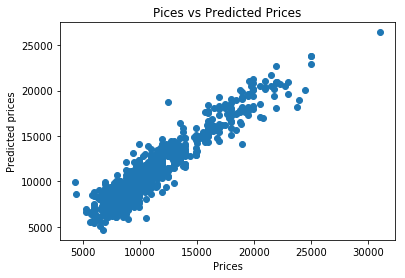

In [28]:
corolla_predict = (corolla_pick
                  .assign(Predict = lambda x: 4116.5320 + ((-117.1713) * x.Age_08_04) 
                          + ((-0.0185) * x.KM) 
                          + ((24.2757) * x.HP) 
                          + ((6.1064) * x.Quarterly_Tax) 
                          + ((10.4946) * x.Weight) 
                          + ((-302.3014) * x.ABS) 
                          + ((2570.0265) * x.Automatic_airco) 
                          + ((524.5258) * x.Powered_Windows)))

from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x = corolla_predict['Price'], y = corolla_predict['Predict'])
plt.ylabel('Predicted prices')
plt.xlabel('Prices')
plt.title("Pices vs Predicted Prices")

# Summary

의의
    - 통계학, 파이썬, 머신러닝을 배우면서 각각의 방법론을 적용해볼 수 있었다.
    - 무슨 차이가 발생하는지 체험할 수 있는 시간이었음
    - 단순히 변수가 많은 것보다 좋은 변수를 적절히 선정하는 것의 중요성을 알 수 있었다.
    - 회귀분석의 절차가 어떻게 이뤄지는 지 알 수 있었다
    - 체계적인 파일 관리의 중요성을 알 수 있었다
    
아쉬운 점
    - 이상치를 어떻게 처리할 지 시도를 여러번 했으나, 결국 raw data 그대로 진행
    - 여러 방법론을 적용해볼 수 있었지만, 그만큼 혼동될 때가 많았다
    